Para lidar com que lingua, caso use um maior com mais datas

https://www.kaggle.com/leticehs/nlp1-part1-dataset-cut

In [1]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [2]:
# controla tamanho geral das figuras no matplotlib/seaborn
TAMANHO_GERAL = [15, 10]
plt.rcParams['figure.figsize'] = TAMANHO_GERAL
sns.set(rc={'figure.figsize' : TAMANHO_GERAL})

In [3]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"

**Resumo diário dos preço**

In [4]:
# https://www.kaggle.com/mczielinski/bitcoin-historical-data
dfPrice = pd.read_csv('Data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
dfPrice

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [5]:
dfPrice = dfPrice.dropna(how="all",subset=dfPrice.columns[1:])
dfPrice['Timestamp'] = pd.to_datetime(dfPrice['Timestamp'], unit='s')
# set index timestamp column
dfPrice = dfPrice.set_index("Timestamp")
#Avaliando só em um mês
#three month
#data inicial
dataIni='2016-01-01'
#data final
dataFim='2019-03-29'
dfPrice["Date"] = dfPrice.index.date
dfPrice = dfPrice[dataIni : dataFim] 
dfMaxMin_perDay  = pd.concat([dfPrice.groupby("Date").max().add_suffix('_max'), dfPrice.groupby("Date").min().add_suffix('_min')], axis=1)
dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min
Date,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869


In [6]:
dfMaxMin_perDay["variacao"] = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_min'])*100/ dfMaxMin_perDay['Open_min']).values
dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao
Date,,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000,1.950147
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860,1.251742
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493,2.312861
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216,1.727116
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580,1.364282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628,2.948034
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764,1.087892
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869,3.104028


In [14]:
dfMaxMin_perDay["variacao_openclose_max"] = ((dfMaxMin_perDay['Close_max'] - dfMaxMin_perDay['Open_max'])*100/ dfMaxMin_perDay['Open_max']).values
dfMaxMin_perDay["variacao_openclose_min"] = ((dfMaxMin_perDay['Close_min'] - dfMaxMin_perDay['Open_min'])*100/ dfMaxMin_perDay['Open_min']).values

dfMaxMin_perDay 

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao,variacao_openclose_max,variacao_openclose_min
Date,,,,,,,,,,,,,,,,,
2016-01-01,436.00,436.00,436.00,436.00,190.517583,8.287514e+04,436.000000,427.66,427.66,427.20,427.28,0.005424,2.351308,427.660000,1.950147,0.000000,-0.088856
2016-01-02,435.99,435.99,435.99,435.99,151.286879,6.580372e+04,435.990000,430.60,430.70,430.42,430.50,0.011481,5.000000,430.601860,1.251742,0.000000,-0.023223
2016-01-03,433.89,434.09,433.89,433.96,165.870201,7.084861e+04,433.890000,424.15,424.15,424.06,424.06,0.011411,4.878782,424.126493,2.312861,0.016133,-0.021219
2016-01-04,435.49,435.86,435.49,435.86,574.487586,2.495248e+05,435.490000,428.46,428.50,428.44,428.47,0.011300,4.884990,428.463216,1.727116,0.084962,0.002334
2016-01-05,435.37,435.39,435.37,435.39,202.789091,8.752876e+04,435.370000,429.53,429.58,429.50,429.52,0.000349,0.151903,429.513580,1.364282,0.004594,-0.002328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-25,3978.19,3980.22,3978.19,3978.19,357.918590,1.397080e+06,3978.190000,3864.27,3865.79,3850.45,3859.54,0.001371,5.449384,3860.201628,2.948034,0.000000,-0.122403
2019-03-26,3923.17,3936.36,3922.14,3923.12,196.431773,7.708970e+05,3924.502706,3880.90,3882.37,3879.50,3881.02,0.002287,8.948421,3881.022764,1.087892,-0.001274,0.003092
2019-03-27,4035.00,4037.11,4034.16,4034.44,362.545463,1.456930e+06,4034.987861,3912.98,3912.98,3912.19,3912.97,0.001500,5.955435,3912.976869,3.104028,-0.013879,-0.000256


<AxesSubplot:xlabel='Date', ylabel='Close_max'>

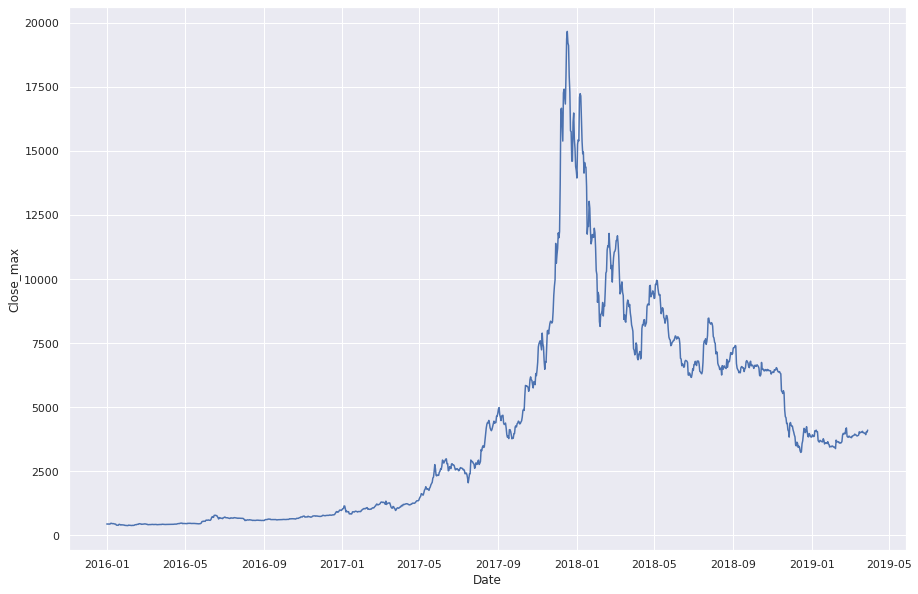

In [15]:
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "Close_max")

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='Volume_(Currency)_max'>

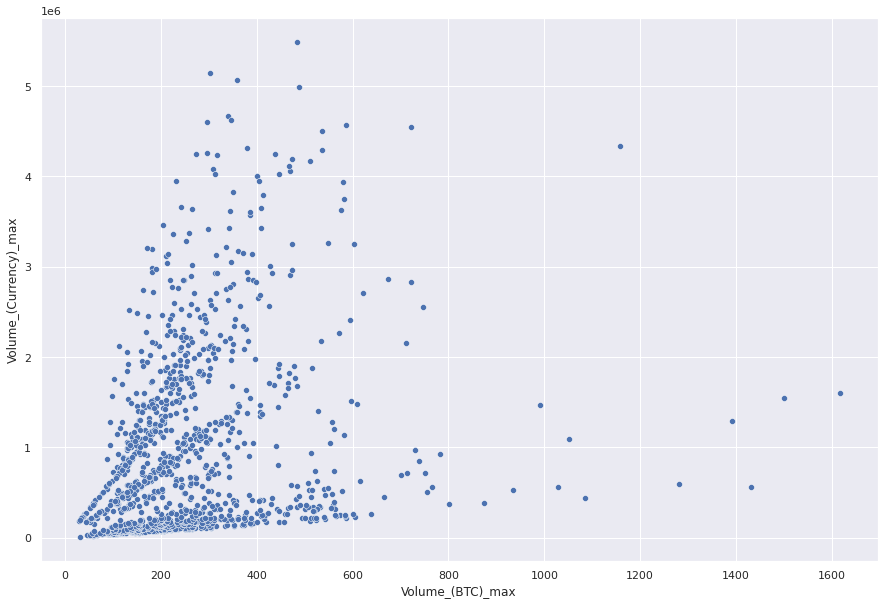

In [27]:
# é interessante notar que além do comportamento óbvio (o volume de bitcoins negociados se traduzindo de maneira relativamente linear com o volume de dinheiro negociado),
# temos "4/5 faixas principais", podemos confirmar a existência dessa tendência de agrupamento por meio de histogramas / KMeans para pegar o coeficiente angular dessas retas
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["Volume_(Currency)_max"])

In [92]:
tmp = (dfMaxMin_perDay["Volume_(Currency)_max"] / dfMaxMin_perDay["Volume_(BTC)_max"])

(array([326., 110.,  52.,  16.,  10.,  37.,  31.,  11.,  57.,  82.,  35.,
         13.,   1.,   6.,  14.,  39.,  87.,  32.,  24.,  24.,  22.,  28.,
         18.,  12.,   9.,  11.,   3.,   8.,   8.,   9.,   4.,   2.,   2.,
          1.,   6.,   5.,   1.,   5.,   3.,   3.,   2.,   2.,   2.,   2.,
          3.,   2.,   1.,   0.,   0.,   3.]),
 array([  365.80325918,   737.19468589,  1108.58611259,  1479.9775393 ,
         1851.368966  ,  2222.7603927 ,  2594.15181941,  2965.54324611,
         3336.93467282,  3708.32609952,  4079.71752623,  4451.10895293,
         4822.50037964,  5193.89180634,  5565.28323305,  5936.67465975,
         6308.06608646,  6679.45751316,  7050.84893987,  7422.24036657,
         7793.63179328,  8165.02321998,  8536.41464669,  8907.80607339,
         9279.1975001 ,  9650.5889268 , 10021.98035351, 10393.37178021,
        10764.76320692, 11136.15463362, 11507.54606033, 11878.93748703,
        12250.32891374, 12621.72034044, 12993.11176715, 13364.50319385,
        13

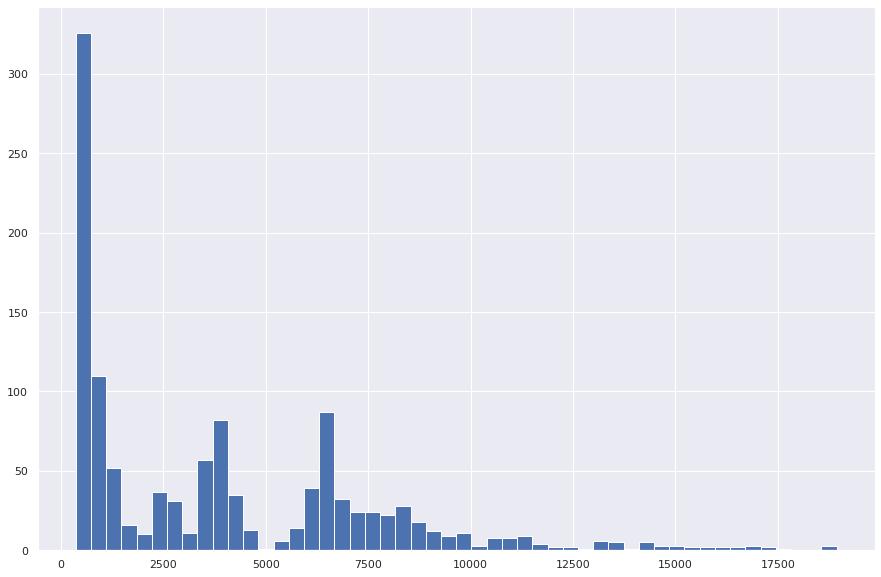

In [93]:
# podemos ver pelo histograma abaixo que temos algumas faixas mais comuns que outras, por exemplo o valor de coeficiente angular = 2 praticamente não existe, mas existe com 1.5 e com 2.4
# isso são as faixas que podem ser vistas acima
plt.hist(tmp, bins=50)

In [127]:
from sklearn.cluster import KMeans

In [128]:
km = KMeans(n_clusters=5, init = np.array([700, 2500, 400, 6500, 10000]).reshape(5, 1))

In [129]:
km.fit(tmp.to_numpy().reshape(-1, 1))

KMeans(init=array([[  700],
       [ 2500],
       [  400],
       [ 6500],
       [10000]]),
       n_clusters=5)

In [130]:
# esses podem ser considerados os coeficientes angulares das 4 retas dos dados acima
km.cluster_centers_.ravel()

array([ 2408.19199247,  3957.24643649,   700.53089962,  7339.80950887,
       13403.86501188])

In [136]:
predictions = km.predict(tmp.to_numpy().reshape(-1, 1))

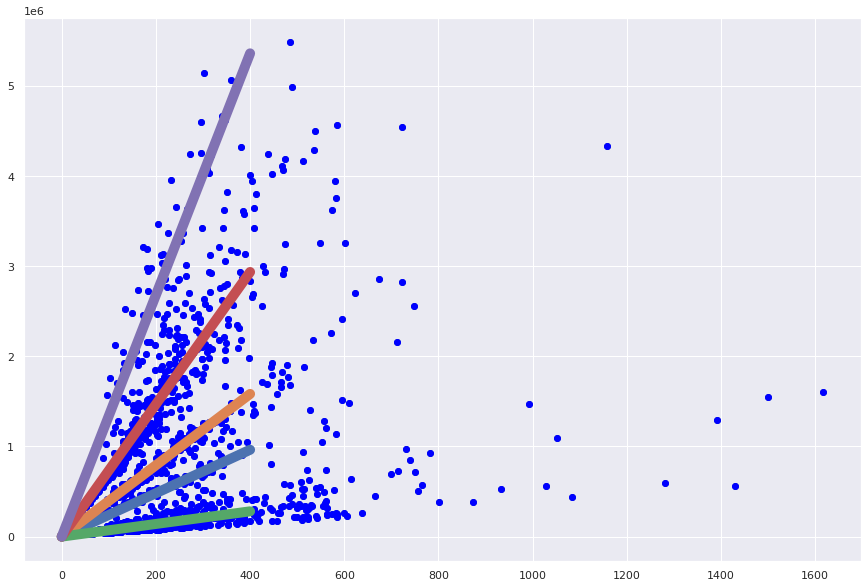

In [133]:
plt.scatter(dfMaxMin_perDay["Volume_(BTC)_max"], dfMaxMin_perDay["Volume_(Currency)_max"])
tv = np.linspace(0, 400, int(1e4))
for m in km.cluster_centers_.ravel():
    plt.plot(tv, [m * ti for ti in tv], linewidth=10)
plt.scatter(dfMaxMin_perDay["Volume_(BTC)_max"], dfMaxMin_perDay["Volume_(Currency)_max"], color = "blue")

In [155]:
dfMaxMin_perDay["grupo_currencyvolume"] = predictions

<AxesSubplot:xlabel='Date', ylabel='Close_max'>

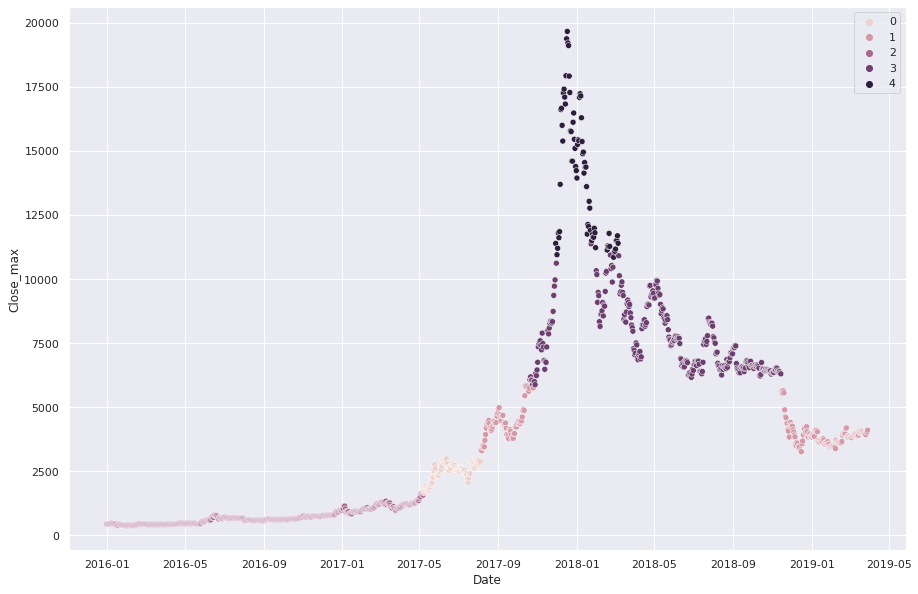

In [194]:
# o bitcoin tem "patamares" de preço, o coeficiente angular do gráfico acima é basicamente o preço do bitcoin (com algumas exceções!, ver que gráfico abaixo em que alguns dias tem vizinhos de cores diferentes),
# isso mostra que o preço não é exatamente uniformemente distribuido
# a moeda passa um tempo com um certo patamar e depois muda para outro rapidamente, essas variações são abruptas, de forma que alguns coeficientes angulares no gráfico acima não apareçam
sns.scatterplot(x=dfMaxMin_perDay.index, y=dfMaxMin_perDay["Close_max"], hue = predictions)

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='variacao'>

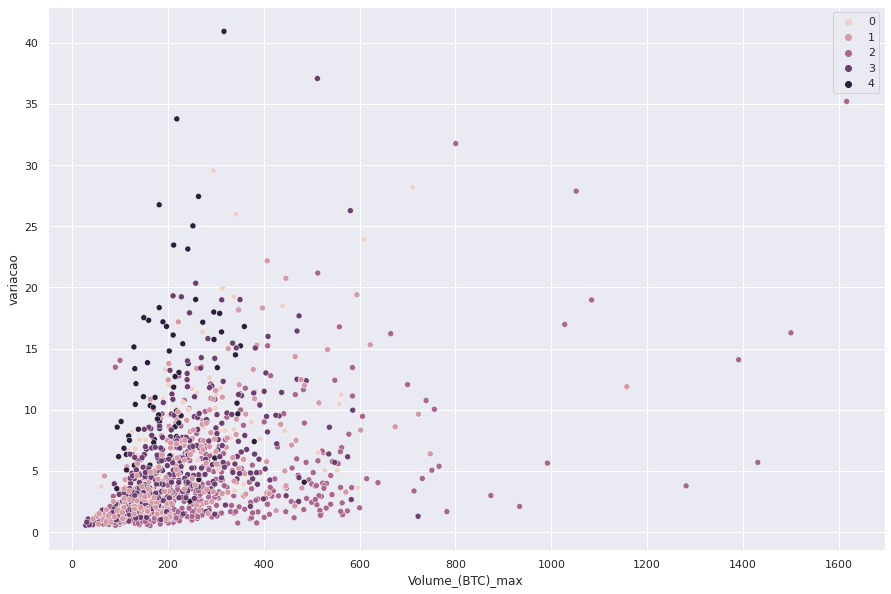

In [202]:
# podemos tentar usar essas categorias de patameres para ver alguma tendência/correlação
# volume x variacao
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["variacao"], hue = predictions)

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='Close_max'>

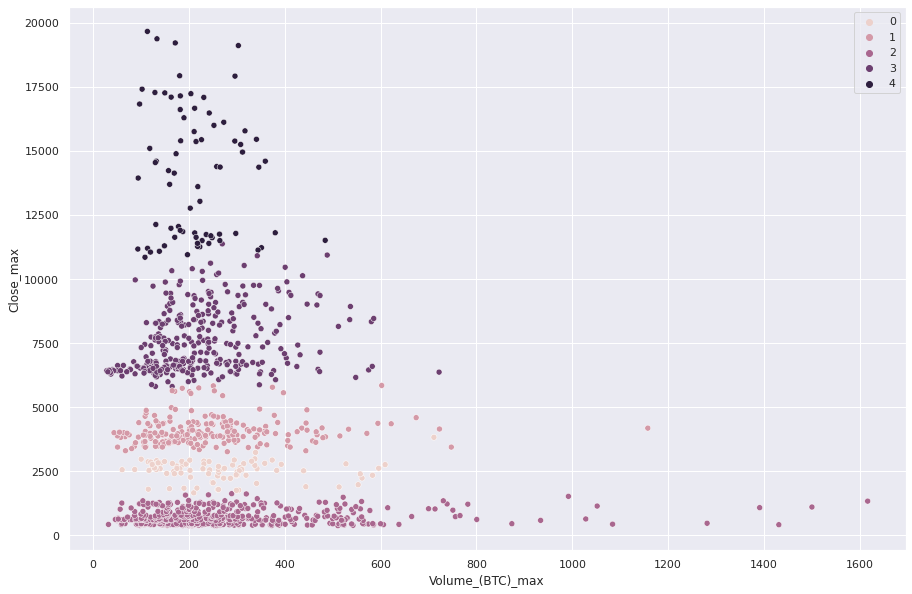

In [206]:
# claro que o valor de close_max vai estar fortemente correlacionado, ainda assim esses grupos que achamos indicam tendências, vemos que a dispersão de cada uma
# parece manter pouca dependência com outros grupos, de qualquer forma esses grupos parecem ser relevantes para correlações e análise do comportamento do bitcoin
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["Close_max"], hue = predictions)

<AxesSubplot:xlabel='Volume_(BTC)_max', ylabel='variacao_openclose_max'>

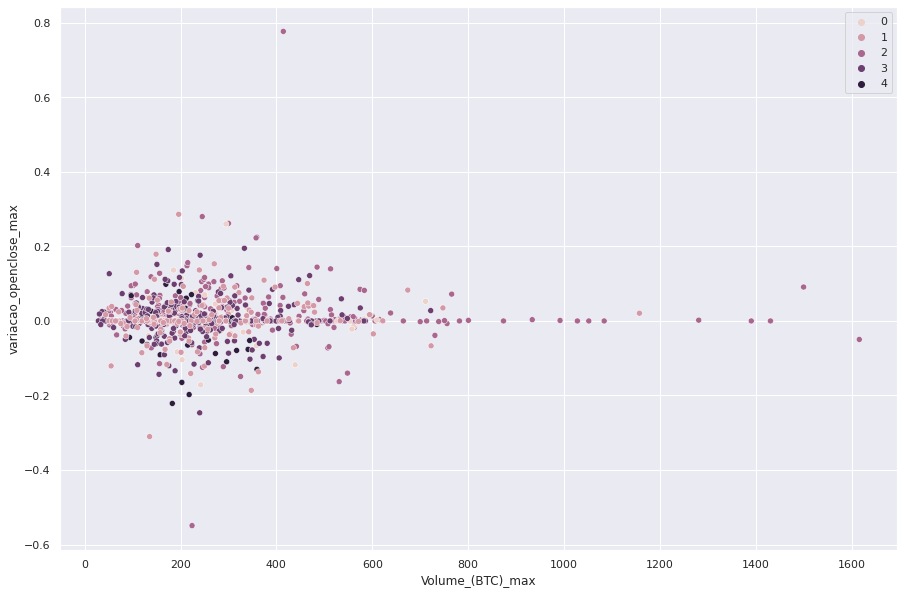

In [205]:
sns.scatterplot(x=dfMaxMin_perDay["Volume_(BTC)_max"], y=dfMaxMin_perDay["variacao_openclose_max"], hue = predictions)

<AxesSubplot:xlabel='Date', ylabel='variacao_openclose_max'>

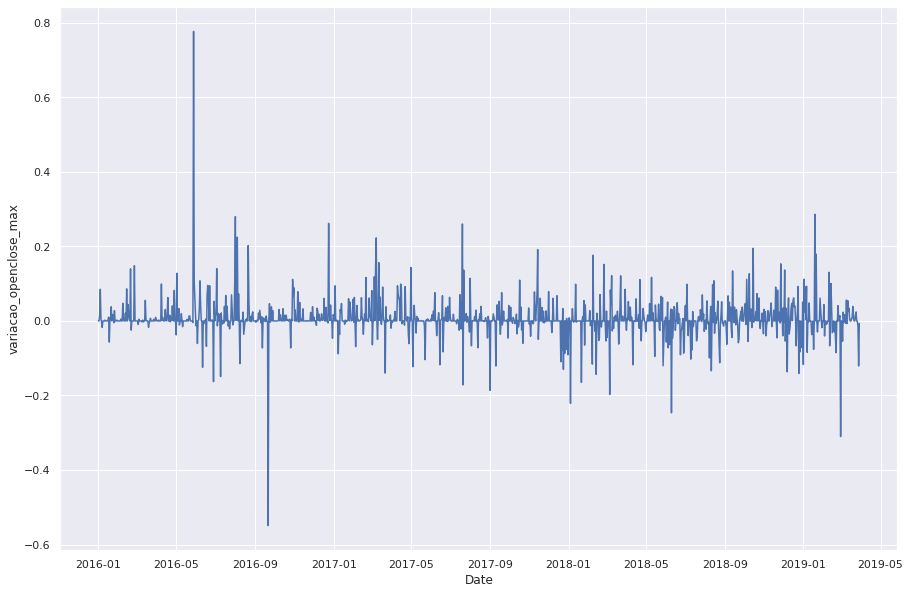

In [9]:
# há alguns picos interessantes (que estão fora da data combinada 2018-03 <-> 2019-03)
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "variacao_openclose_max")

<AxesSubplot:xlabel='Date', ylabel='variacao_openclose_min'>

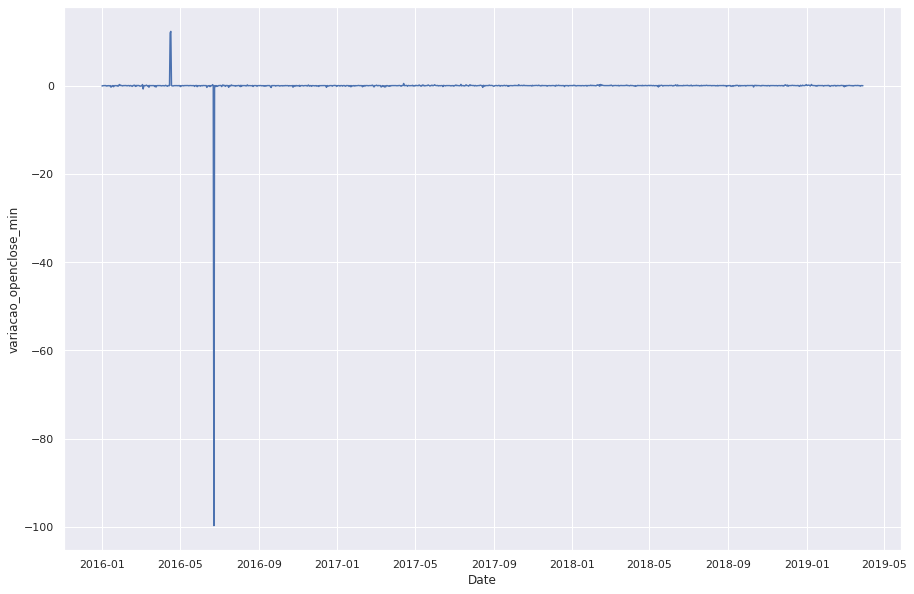

In [16]:
sns.lineplot(data = dfMaxMin_perDay, x = "Date", y = "variacao_openclose_min")

In [10]:
# alguns dias possuem variações atípicas de valor de abertura/fechamento max/min
dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_max"]) > 0.5]

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao,variacao_openclose_max
Date,,,,,,,,,,,,,,,,
2016-05-28,525.00,529.08,524.35,529.08,414.439940,206138.17669,527.727739,469.11,470.25,468.0,468.0,0.010047,4.989999,468.282651,12.783782,0.777143
2016-09-21,600.85,601.01,597.10,597.55,224.049297,133122.00966,599.938813,592.10,592.90,592.1,592.1,0.008383,4.999998,592.773985,0.920453,-0.549222


In [17]:
dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_min"]) > 0.5]

,Open_max,High_max,Low_max,Close_max,Volume_(BTC)_max,Volume_(Currency)_max,Weighted_Price_max,Open_min,High_min,Low_min,Close_min,Volume_(BTC)_min,Volume_(Currency)_min,Weighted_Price_min,variacao,variacao_openclose_max,variacao_openclose_min
Date,,,,,,,,,,,,,,,,,
2016-03-05,408.95,408.98,408.95,408.95,1430.761155,558785.046910,408.950000,386.92,387.77,382.00,384.00,0.012215,4.922470,384.120903,5.693683,0.000000,-0.754678
2016-04-16,432.87,432.87,432.87,432.87,90.382887,38864.629637,432.870000,381.47,427.31,381.47,427.12,0.002712,1.164959,414.377203,13.474192,0.000000,11.966865
2016-04-17,430.84,430.91,430.84,430.91,100.174318,42645.678333,430.899002,377.87,424.30,377.87,424.30,0.012032,5.166494,424.300000,14.036573,0.016247,12.287295
2016-06-23,632.36,632.67,632.00,632.36,1027.959999,566265.104610,632.258641,540.61,547.58,1.50,1.50,0.007795,4.558803,532.309155,16.971569,0.000000,-99.722536


<AxesSubplot:xlabel='variacao_openclose_max', ylabel='Count'>

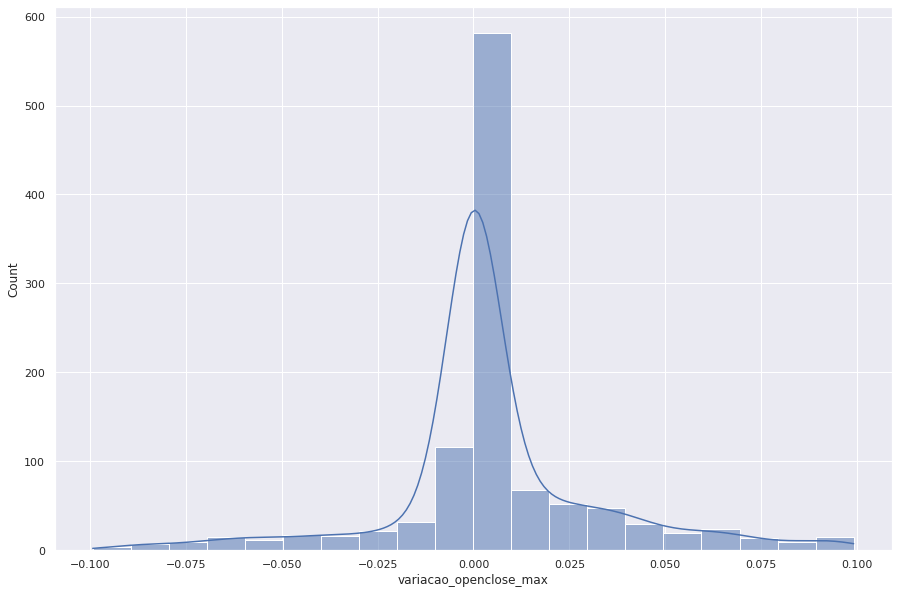

In [23]:
# quando analisamos variacao_openclose_max temos um viés de variação positiva, com o mínimo um viés negativo
sns.histplot(x = dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_max"]) < 0.1]["variacao_openclose_max"], kde = True, bins=20)

<AxesSubplot:xlabel='variacao_openclose_min', ylabel='Count'>

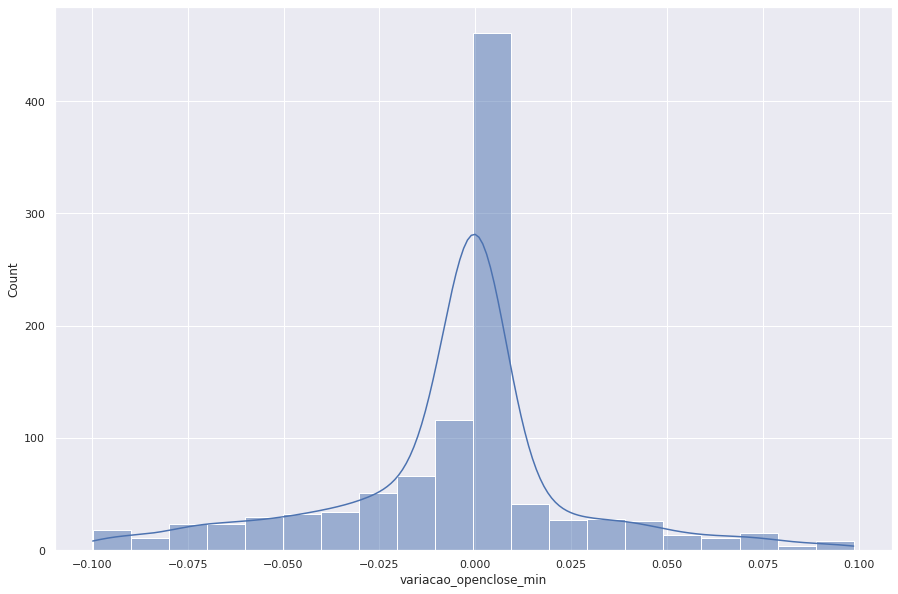

In [24]:
sns.histplot(x = dfMaxMin_perDay[abs(dfMaxMin_perDay["variacao_openclose_min"]) < 0.1]["variacao_openclose_min"], kde = True, bins=20)

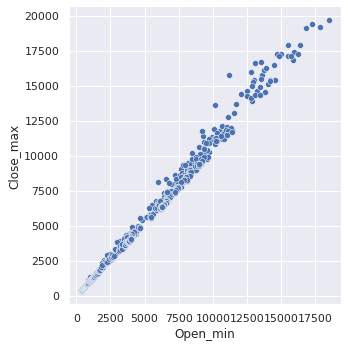

In [12]:
## claramente open_min e close_max não podem ter uma variação muito grande, y \approx x
sns.relplot(x="Open_min", y="Close_max", data=dfMaxMin_perDay)

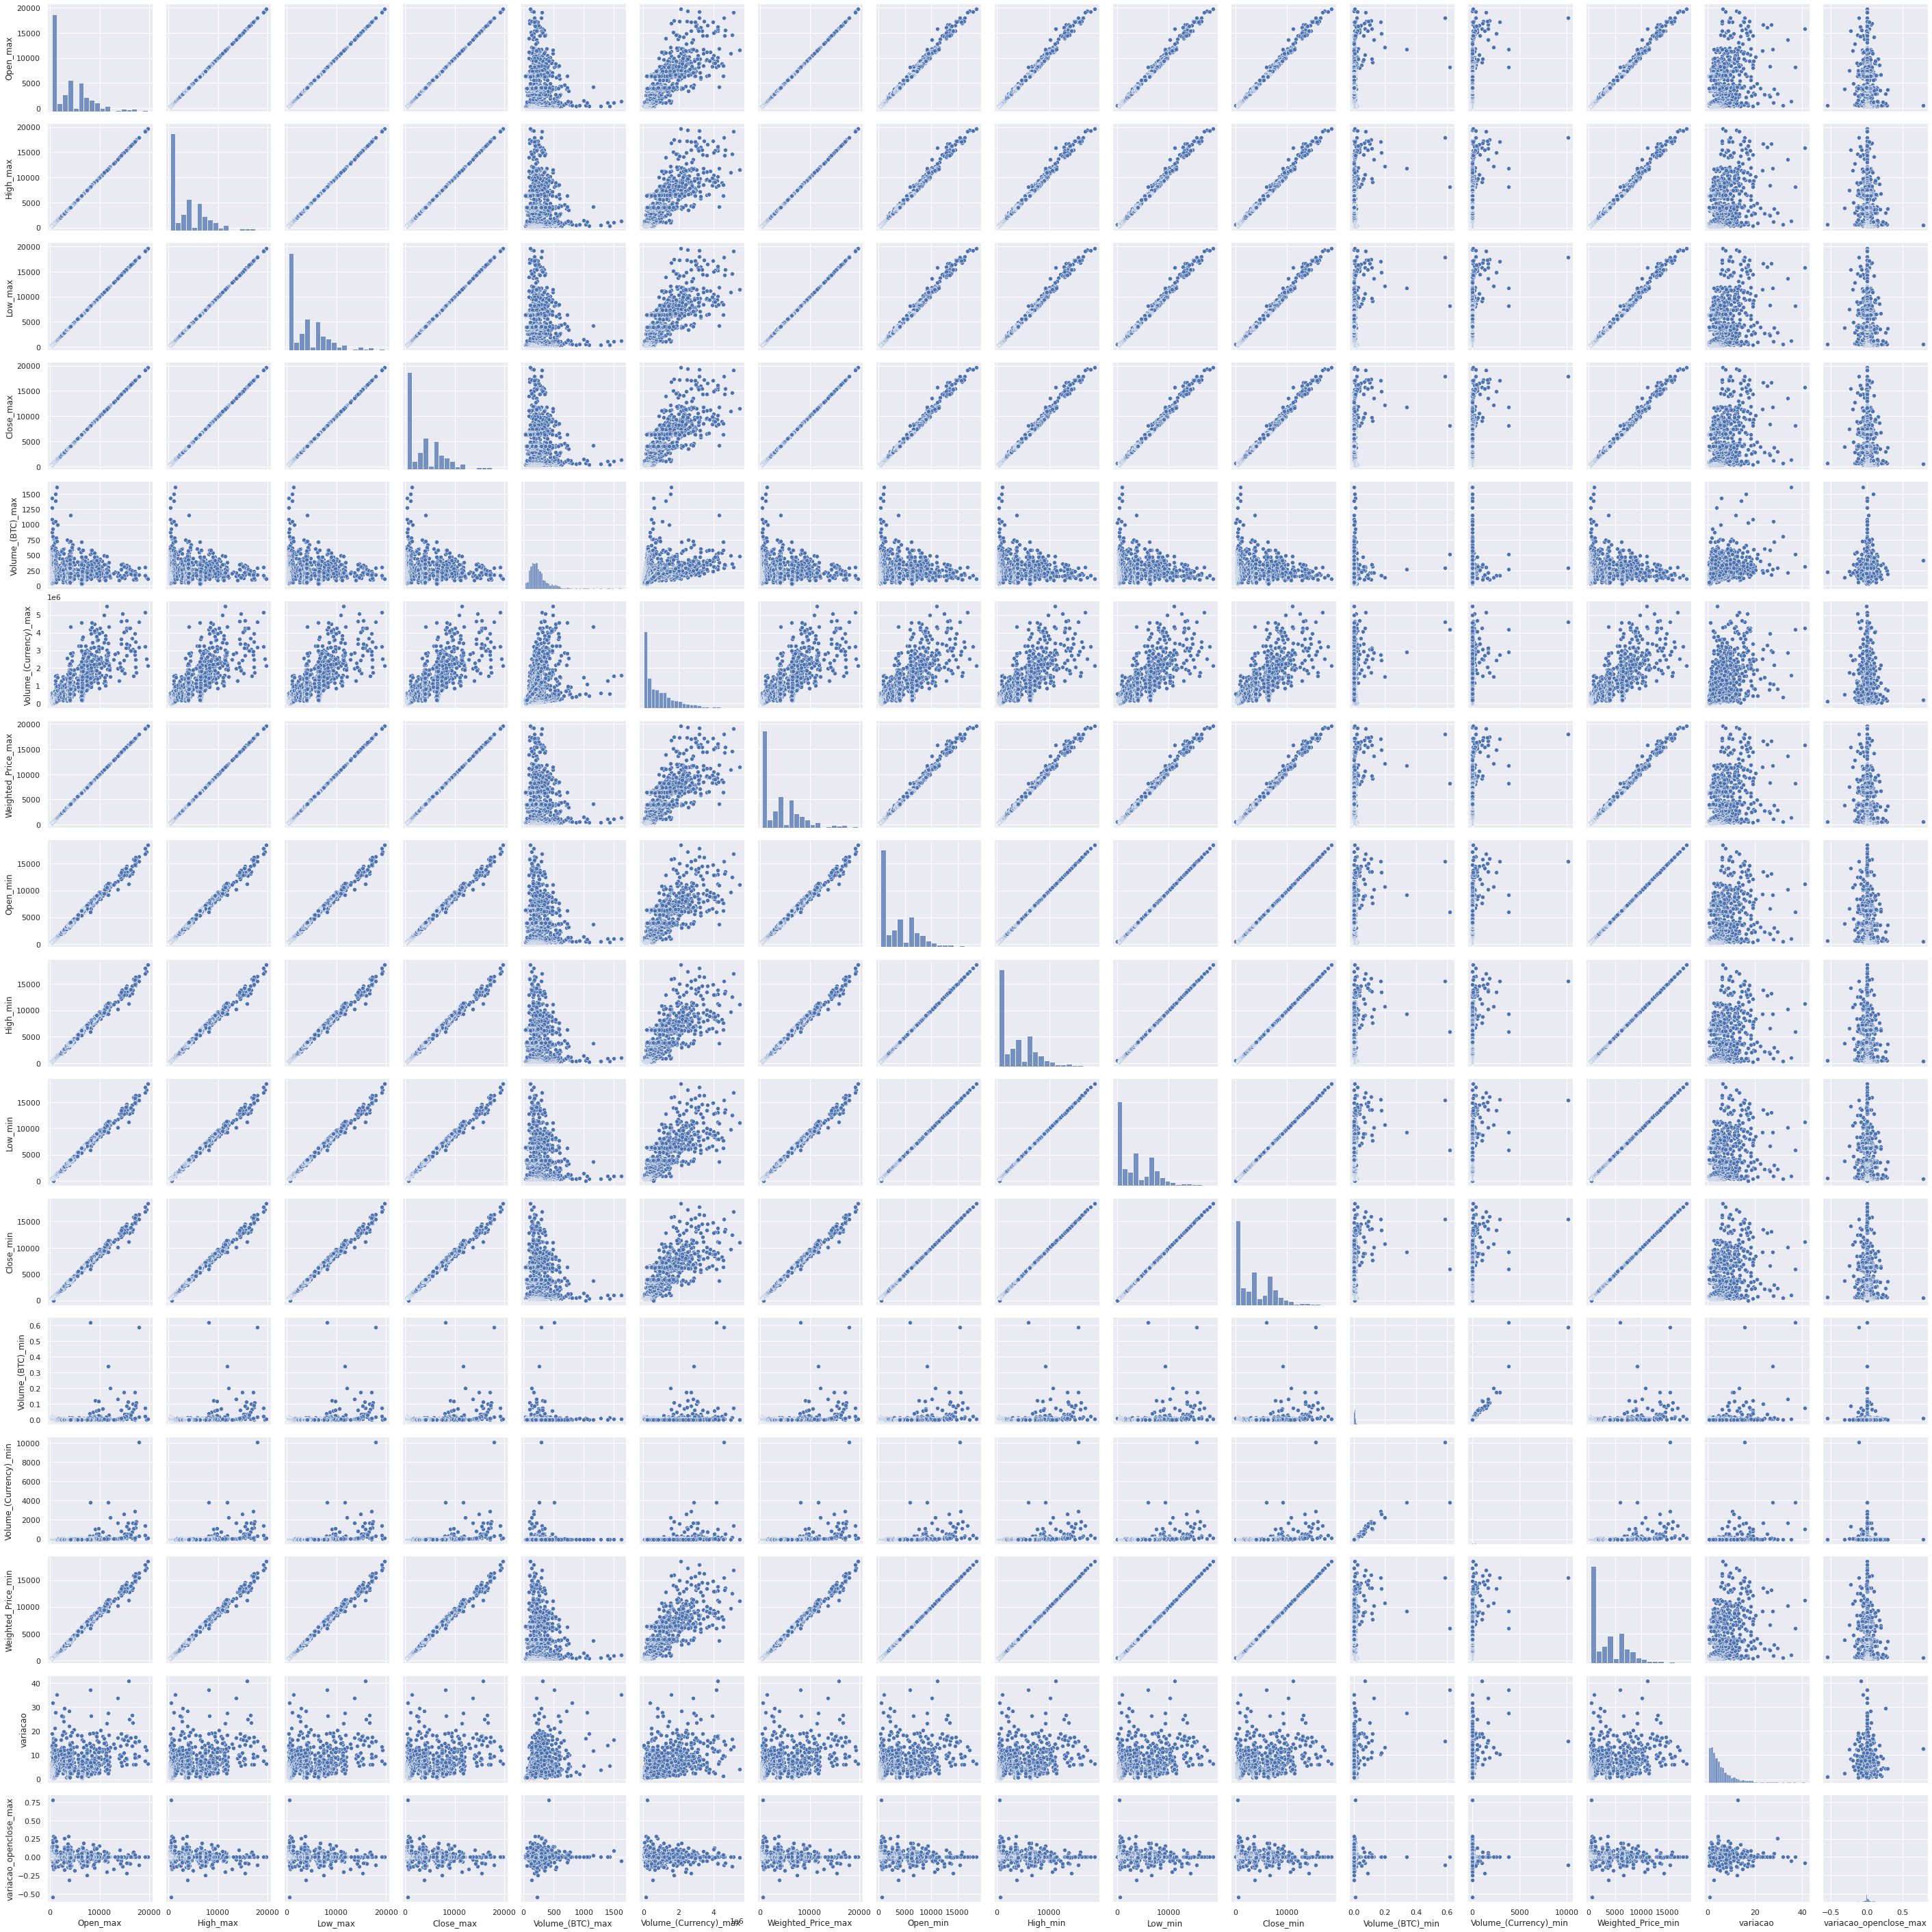

In [13]:
sns.pairplot(dfMaxMin_perDay)

**Tweets Bitcoin**

In [207]:
# https://www.kaggle.com/alaix14/bitcoin-tweets-20160101-to-20190329
import random

p = 0.005

dfTweets = pd.read_csv('Data/tweets.csv',delimiter=';', skiprows=lambda i: i>0 and random.random() > p, lineterminator='\n' )
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text\r
0,1.132977e+18,jimmy_rosset,CryptoNaut,NaN,2019-05-27 11:50:18+00,0,0,0,@candles_ste Le Bitcoin ne ferme jamais :)\r
1,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:50:29+00,0,0,0,Current Crypto Prices! \n\nBTC: $8718.83 USD\n...
2,1.132784e+18,CCNMarkets,CCN.com,NaN,2019-05-26 23:01:01+00,17,565,200,"Bitcoin Price Surpasses $8,600 in Big Overnigh..."
3,1.132979e+18,DianAshari84,Dian jack,NaN,2019-05-27 11:57:36+00,0,0,0,Good project\r
4,1.132979e+18,IDreamOfGems,𝐼 𝒟𝓇𝑒𝒶𝓂 𝒪𝒻 𝒢𝑒𝓂𝓈,NaN,2019-05-27 11:58:08+00,0,0,0,So the insane mex funding is longs paying shor...
...,...,...,...,...,...,...,...,...,...
84193,1.198261e+18,Saint_BITCOIN,Saint_Bitcoin,NaN,2019-11-23 15:23:26+00,0,0,0,"@silentstorm76 Bullets, Beef, Bitcoin, Boobies..."
84194,1.198263e+18,CryptoTraderPro,Crypto Trader Pro,NaN,2019-11-23 15:30:33+00,0,0,0,Bitcoin Dominance Struggling Against Resistanc...
84195,1.198264e+18,JacekSalaj,tip jar BTC 3MZ1jmj5ESJCkLeaVYQ1Y6JfEnuen6AYXW,NaN,2019-11-23 15:35:11+00,0,0,0,XRP BTC FIBONACCI HARMONIC PATTERNS https://t....
84196,1.198264e+18,TradeIta,S7eez - Cripto Ita Trade 💹🇮🇹,NaN,2019-11-23 15:37:30+00,0,0,0,Click below to see my 24-hour #Bitcoin price p...


In [208]:
dfTweets['date'] = pd.to_datetime(dfTweets['timestamp'],format= '%Y-%m-%d').dt.date

In [209]:
dfTweets.columns = ["id", "user", "fullname", "url", "timestamp", "replies","likes","retweets","text","date"]

In [210]:
%%time
#vê um melhor
import langid
#langid.classify("Soy muy")
dfTweets['Language'] = dfTweets['text'].apply(lambda x: langid.classify(x)[0])
dfTweets

CPU times: user 9min 55s, sys: 8min 13s, total: 18min 9s
Wall time: 2min 28s


,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language
0,1.132977e+18,jimmy_rosset,CryptoNaut,NaN,2019-05-27 11:50:18+00,0,0,0,@candles_ste Le Bitcoin ne ferme jamais :)\r,2019-05-27,fr
1,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:50:29+00,0,0,0,Current Crypto Prices! \n\nBTC: $8718.83 USD\n...,2019-05-27,en
2,1.132784e+18,CCNMarkets,CCN.com,NaN,2019-05-26 23:01:01+00,17,565,200,"Bitcoin Price Surpasses $8,600 in Big Overnigh...",2019-05-26,en
3,1.132979e+18,DianAshari84,Dian jack,NaN,2019-05-27 11:57:36+00,0,0,0,Good project\r,2019-05-27,en
4,1.132979e+18,IDreamOfGems,𝐼 𝒟𝓇𝑒𝒶𝓂 𝒪𝒻 𝒢𝑒𝓂𝓈,NaN,2019-05-27 11:58:08+00,0,0,0,So the insane mex funding is longs paying shor...,2019-05-27,en
...,...,...,...,...,...,...,...,...,...,...,...
84193,1.198261e+18,Saint_BITCOIN,Saint_Bitcoin,NaN,2019-11-23 15:23:26+00,0,0,0,"@silentstorm76 Bullets, Beef, Bitcoin, Boobies...",2019-11-23,en
84194,1.198263e+18,CryptoTraderPro,Crypto Trader Pro,NaN,2019-11-23 15:30:33+00,0,0,0,Bitcoin Dominance Struggling Against Resistanc...,2019-11-23,en
84195,1.198264e+18,JacekSalaj,tip jar BTC 3MZ1jmj5ESJCkLeaVYQ1Y6JfEnuen6AYXW,NaN,2019-11-23 15:35:11+00,0,0,0,XRP BTC FIBONACCI HARMONIC PATTERNS https://t....,2019-11-23,en
84196,1.198264e+18,TradeIta,S7eez - Cripto Ita Trade 💹🇮🇹,NaN,2019-11-23 15:37:30+00,0,0,0,Click below to see my 24-hour #Bitcoin price p...,2019-11-23,en


In [211]:
#limpar para EN
dfTweets = dfTweets[dfTweets['Language']=='en']
dfTweets

,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language
1,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:50:29+00,0,0,0,Current Crypto Prices! \n\nBTC: $8718.83 USD\n...,2019-05-27,en
2,1.132784e+18,CCNMarkets,CCN.com,NaN,2019-05-26 23:01:01+00,17,565,200,"Bitcoin Price Surpasses $8,600 in Big Overnigh...",2019-05-26,en
3,1.132979e+18,DianAshari84,Dian jack,NaN,2019-05-27 11:57:36+00,0,0,0,Good project\r,2019-05-27,en
4,1.132979e+18,IDreamOfGems,𝐼 𝒟𝓇𝑒𝒶𝓂 𝒪𝒻 𝒢𝑒𝓂𝓈,NaN,2019-05-27 11:58:08+00,0,0,0,So the insane mex funding is longs paying shor...,2019-05-27,en
6,1.132980e+18,wasangeles,ρєямαиєитℓу нιgн ρℓαтєαμ,NaN,2019-05-27 12:00:32+00,0,0,0,@Trader_Dante Sentiment cycles ftw.\n\n@NickGi...,2019-05-27,en
...,...,...,...,...,...,...,...,...,...,...,...
84193,1.198261e+18,Saint_BITCOIN,Saint_Bitcoin,NaN,2019-11-23 15:23:26+00,0,0,0,"@silentstorm76 Bullets, Beef, Bitcoin, Boobies...",2019-11-23,en
84194,1.198263e+18,CryptoTraderPro,Crypto Trader Pro,NaN,2019-11-23 15:30:33+00,0,0,0,Bitcoin Dominance Struggling Against Resistanc...,2019-11-23,en
84195,1.198264e+18,JacekSalaj,tip jar BTC 3MZ1jmj5ESJCkLeaVYQ1Y6JfEnuen6AYXW,NaN,2019-11-23 15:35:11+00,0,0,0,XRP BTC FIBONACCI HARMONIC PATTERNS https://t....,2019-11-23,en
84196,1.198264e+18,TradeIta,S7eez - Cripto Ita Trade 💹🇮🇹,NaN,2019-11-23 15:37:30+00,0,0,0,Click below to see my 24-hour #Bitcoin price p...,2019-11-23,en


In [212]:
%%time
sentimental = [sentiment_scores(i) for i in dfTweets['text']]

dfTweets["Sentimento"] = sentimental
dfTweets

CPU times: user 6min 32s, sys: 5.01 s, total: 6min 37s
Wall time: 6min 39s


,id,user,fullname,url,timestamp,replies,likes,retweets,text,date,Language,Sentimento
1,1.132977e+18,DetroitCrypto,J. Scardina,NaN,2019-05-27 11:50:29+00,0,0,0,Current Crypto Prices! \n\nBTC: $8718.83 USD\n...,2019-05-27,en,Neutral
2,1.132784e+18,CCNMarkets,CCN.com,NaN,2019-05-26 23:01:01+00,17,565,200,"Bitcoin Price Surpasses $8,600 in Big Overnigh...",2019-05-26,en,Neutral
3,1.132979e+18,DianAshari84,Dian jack,NaN,2019-05-27 11:57:36+00,0,0,0,Good project\r,2019-05-27,en,Positive
4,1.132979e+18,IDreamOfGems,𝐼 𝒟𝓇𝑒𝒶𝓂 𝒪𝒻 𝒢𝑒𝓂𝓈,NaN,2019-05-27 11:58:08+00,0,0,0,So the insane mex funding is longs paying shor...,2019-05-27,en,Negative
6,1.132980e+18,wasangeles,ρєямαиєитℓу нιgн ρℓαтєαμ,NaN,2019-05-27 12:00:32+00,0,0,0,@Trader_Dante Sentiment cycles ftw.\n\n@NickGi...,2019-05-27,en,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
84193,1.198261e+18,Saint_BITCOIN,Saint_Bitcoin,NaN,2019-11-23 15:23:26+00,0,0,0,"@silentstorm76 Bullets, Beef, Bitcoin, Boobies...",2019-11-23,en,Positive
84194,1.198263e+18,CryptoTraderPro,Crypto Trader Pro,NaN,2019-11-23 15:30:33+00,0,0,0,Bitcoin Dominance Struggling Against Resistanc...,2019-11-23,en,Negative
84195,1.198264e+18,JacekSalaj,tip jar BTC 3MZ1jmj5ESJCkLeaVYQ1Y6JfEnuen6AYXW,NaN,2019-11-23 15:35:11+00,0,0,0,XRP BTC FIBONACCI HARMONIC PATTERNS https://t....,2019-11-23,en,Positive
84196,1.198264e+18,TradeIta,S7eez - Cripto Ita Trade 💹🇮🇹,NaN,2019-11-23 15:37:30+00,0,0,0,Click below to see my 24-hour #Bitcoin price p...,2019-11-23,en,Neutral


In [213]:
del dfTweets['id']

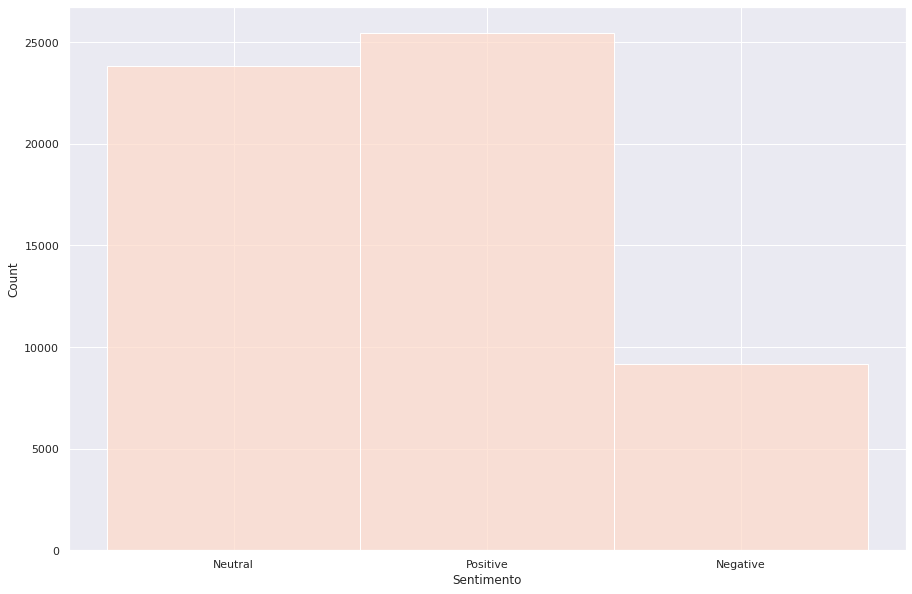

In [214]:
sns.histplot(data = dfTweets["Sentimento"]);

In [215]:
dfTweets.groupby("Sentimento").mean()

,replies,likes,retweets
Sentimento,,,
Negative,0.418118,4.394490,1.391115
Neutral,0.187773,1.991176,0.962101
Positive,0.608395,3.132093,1.342208


In [216]:
dfTweets.groupby("Sentimento").sum()

,replies,likes,retweets
Sentimento,,,
Negative,3840,40359,12776
Neutral,4469,47390,22898
Positive,15494,79765,34182


In [217]:
dfTweets.groupby("date").sum()

,replies,likes,retweets
date,,,
2012-01-01,0,0,0
2012-01-02,0,0,0
2012-01-04,0,0,0
2012-01-05,0,0,0
2012-01-20,0,0,0
...,...,...,...
2019-11-19,44,115,66
2019-11-20,30,1297,235
2019-11-21,137,1024,284


In [218]:
dfResumoDiario = pd.concat([dfTweets.groupby("date").sum(), dfMaxMin_perDay['variacao']], axis=1).dropna()
dfResumoDiario 

,replies,likes,retweets,variacao
2016-01-01,0.0,0.0,2.0,1.950147
2016-01-02,0.0,0.0,3.0,1.251742
2016-01-03,0.0,0.0,0.0,2.312861
2016-01-04,0.0,0.0,2.0,1.727116
2016-01-05,0.0,0.0,1.0,1.364282
...,...,...,...,...
2019-03-24,0.0,0.0,0.0,0.846346
2019-03-25,0.0,0.0,0.0,2.948034
2019-03-27,0.0,1.0,0.0,3.104028
2019-03-28,13.0,108.0,52.0,0.661960


In [219]:
#mudar isso e deixar de forma melhor
dfResumoDiario['Positivo']  = dfTweets[dfTweets['Sentimento']=='Positive'].groupby("date").count()['Sentimento']
dfResumoDiario['Negative']  = dfTweets[dfTweets['Sentimento']=='Negative'].groupby("date").count()['Sentimento']
dfResumoDiario['Neutral']  = dfTweets[dfTweets['Sentimento']=='Neutral'].groupby("date").count()['Sentimento']
dfResumoDiario = dfResumoDiario.fillna(0)
dfResumoDiario

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
2016-01-01,0.0,0.0,2.0,1.950147,2.0,0.0,4.0
2016-01-02,0.0,0.0,3.0,1.251742,4.0,0.0,1.0
2016-01-03,0.0,0.0,0.0,2.312861,0.0,0.0,1.0
2016-01-04,0.0,0.0,2.0,1.727116,2.0,0.0,0.0
2016-01-05,0.0,0.0,1.0,1.364282,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2019-03-24,0.0,0.0,0.0,0.846346,0.0,0.0,1.0
2019-03-25,0.0,0.0,0.0,2.948034,0.0,0.0,1.0
2019-03-27,0.0,1.0,0.0,3.104028,1.0,1.0,3.0
2019-03-28,13.0,108.0,52.0,0.661960,5.0,4.0,6.0


In [220]:
dfResumoDiario.describe()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
count,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000,983.000000
mean,4.578840,36.779247,18.466938,5.658918,3.388606,1.594100,4.403866
std,31.396837,197.192477,148.082141,5.127892,14.517058,6.896607,15.252480
min,0.000000,0.000000,0.000000,0.530233,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.145862,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,4.078886,0.000000,0.000000,1.000000
75%,0.000000,2.000000,1.000000,7.443264,1.000000,1.000000,2.000000
max,743.000000,3309.000000,3505.000000,40.919643,189.000000,103.000000,197.000000


In [221]:
#Sem nomalizar
dfResumoDiario.corr()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
replies,1.000000,0.588570,0.527167,0.064901,0.436716,0.377639,0.423424
likes,0.588570,1.000000,0.722149,0.041089,0.357726,0.343059,0.357076
retweets,0.527167,0.722149,1.000000,0.031100,0.183595,0.174861,0.189774
variacao,0.064901,0.041089,0.031100,1.000000,0.128397,0.184890,0.145020
Positivo,0.436716,0.357726,0.183595,0.128397,1.000000,0.942591,0.970429
Negative,0.377639,0.343059,0.174861,0.184890,0.942591,1.000000,0.952885
Neutral,0.423424,0.357076,0.189774,0.145020,0.970429,0.952885,1.000000


In [222]:
#normalizando 
dfResumoDiario_norm = pd.DataFrame()
for i in dfResumoDiario:
    dfResumoDiario_norm[i] = (dfResumoDiario[i] -  dfResumoDiario[i].min())/( dfResumoDiario[i].max() - dfResumoDiario[i].min())
dfResumoDiario_norm.corr()

,replies,likes,retweets,variacao,Positivo,Negative,Neutral
replies,1.000000,0.588570,0.527167,0.064901,0.436716,0.377639,0.423424
likes,0.588570,1.000000,0.722149,0.041089,0.357726,0.343059,0.357076
retweets,0.527167,0.722149,1.000000,0.031100,0.183595,0.174861,0.189774
variacao,0.064901,0.041089,0.031100,1.000000,0.128397,0.184890,0.145020
Positivo,0.436716,0.357726,0.183595,0.128397,1.000000,0.942591,0.970429
Negative,0.377639,0.343059,0.174861,0.184890,0.942591,1.000000,0.952885
Neutral,0.423424,0.357076,0.189774,0.145020,0.970429,0.952885,1.000000
